In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.visible_device_list='2'
config.gpu_options.per_process_gpu_memory_fraction = 0.25
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import reuters

#1. 데이터셋 준비
max_words = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

557056/550378 [==============================] - 1s 3us/step: 
8982 train sequences
2246 test sequences
46 classes


In [3]:
## 데이터 보기
index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key
print(' '.join([index_to_word[x] for x in x_train[2]]))
print(y_train[2])

the lt dlrs demand 000 reuter dividend year lt plus billion 04 000 reuter dividend year an worth new vs reuter dlrs of on shrs earnings countries new vs reuter 1985 billion vs 2 lt 4 division 000 reuter from go 000 lt plus which of 000 reuter from total 000 an 71 billion vs reuter dlr also vs shrs earnings countries 4 vs reuter 1985 from vs some now april 0 related in corp it inc strong cents dollar were after april 0 of or of more index 10 of company taking report it in estimated but trading texas said united said of a of up said countries vs 000 3 of central said which of on future of said of a includes of profit said meeting trade vs 3 of up said 1985 were vs pct dlrs
3


In [4]:
# data preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

 # for convering sentences to matrix
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

#Convert class vector to binary class matrix for use with categorical_crossentropy
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [5]:
#2. model design for relu activation 
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout

model = Sequential()
model.add(Dense(16, input_shape=(1000,),
                    kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

for i in range(5):
    model.add(Dense(16, kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

history_model_relu = model.fit(x_train,
                            y_train,
                            batch_size=16,
                            epochs=40,
                            verbose=1,
                            validation_split=0.1)

score_model_relu = model.evaluate(x_test,
                               y_test,
                               batch_size=16,
                               verbose=1)

Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 416us/step - loss: 3.3705 - acc: 0.3302 - val_loss: 2.9083 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 2s 240us/step - loss: 2.7355 - acc: 0.3504 - val_loss: 2.6054 - val_acc: 0.3315
Epoch 3/40
8083/8083 [==============================] - 2s 236us/step - loss: 2.5493 - acc: 0.3444 - val_loss: 2.4840 - val_acc: 0.3315
Epoch 4/40
8083/8083 [==============================] - 2s 236us/step - loss: 2.4301 - acc: 0.3462 - val_loss: 2.3276 - val_acc: 0.3315
Epoch 5/40
8083/8083 [==============================] - 2s 251us/step - loss: 2.3437 - acc: 0.3493 - val_loss: 2.2081 - val_acc: 0.3315
Epoch 6/40
8083/8083 [==============================] - 2s 258us/step - loss: 2.2689 - acc: 0.3829 - val_loss: 2.1532 - val_acc: 0.4650
Epoch 7/40
8083/8083 [==============================] - 3s 339us/step - loss: 2.2227 - acc: 0.4196 - val_loss: 2.1324 - val_acc: 0.4894
E

In [6]:
model = Sequential()
model.add(Dense(16, input_shape=(1000,),
                    kernel_initializer='lecun_normal'))
model.add(Activation('selu'))
model.add(AlphaDropout(0.1))

for i in range(5):
    model.add(Dense(16, kernel_initializer='lecun_normal'))
    model.add(Activation('selu'))
    model.add(AlphaDropout(0.1))

model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

history_model_selu = model.fit(x_train,
                            y_train,
                            batch_size=16,
                            epochs=40,
                            verbose=1,
                            validation_split=0.1)

score_model_selu = model.evaluate(x_test,
                               y_test,
                               batch_size=16,
                               verbose=1)

Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 417us/step - loss: 2.8712 - acc: 0.2771 - val_loss: 2.7832 - val_acc: 0.3415
Epoch 2/40
8083/8083 [==============================] - 2s 236us/step - loss: 2.3332 - acc: 0.3634 - val_loss: 2.1811 - val_acc: 0.3904
Epoch 3/40
8083/8083 [==============================] - 2s 230us/step - loss: 2.1554 - acc: 0.3875 - val_loss: 2.0744 - val_acc: 0.4171
Epoch 4/40
8083/8083 [==============================] - 2s 238us/step - loss: 2.0572 - acc: 0.4328 - val_loss: 1.9294 - val_acc: 0.5072
Epoch 5/40
8083/8083 [==============================] - 2s 245us/step - loss: 1.9751 - acc: 0.4696 - val_loss: 1.8993 - val_acc: 0.5417
Epoch 6/40
8083/8083 [==============================] - 2s 228us/step - loss: 1.9051 - acc: 0.4947 - val_loss: 1.9387 - val_acc: 0.5484
Epoch 7/40
8083/8083 [==============================] - 2s 226us/step - loss: 1.8455 - acc: 0.5190 - val_loss: 1.8685 - val_acc: 0.5539
E

relu result
Test score: 2.0019101688931906
Test accuracy: 0.5253784506053449
selu result
Test score: 1.5359209738771298
Test accuracy: 0.6718610863757791


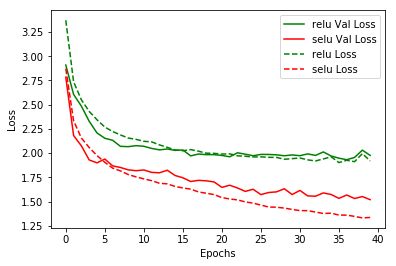

In [7]:
print('relu result')
print('Test score:', score_model_relu[0])
print('Test accuracy:', score_model_relu[1])
print('selu result')
print('Test score:', score_model_selu[0])
print('Test accuracy:', score_model_selu[1])

epochs=40
plt.figure()
plt.plot(range(epochs),
         history_model_relu.history['val_loss'],
         'g-',
         label='relu Val Loss')
plt.plot(range(epochs),
         history_model_selu.history['val_loss'],
         'r-',
         label='selu Val Loss')
plt.plot(range(epochs),
         history_model_relu.history['loss'],
         'g--',
         label='relu Loss')
plt.plot(range(epochs),
         history_model_selu.history['loss'],
         'r--',
         label='selu Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()